# 第2章：感知机

在这一章，用python通过原生代码与scikit-learn库中的感知机模型两种方法实现感知机，数据集采用iris（鸢尾花）数据集。

原生代码实现的感知机算法为原始形式，即算法2.1。

### 感知机——二分类模型
model: $f(x) = sign(w \cdot x+b)$

loss function: $L(w, b) = -\sum_{x_i \in M}y_i(w \cdot x_i+b)$ , 其中$M$为误分类点集合。

### 优化算法——随机梯度下降（Stochastic Gradient Descent, SGD）
首先任意选取一个超平面，然后用SGD方法不断极小化目标函数，在这个过程中一次随机选取一个误分类点使其梯度下降。假设选取误分类点$(x_i,y_i)$则使用SGD优化得到新的$w, b$：

$w = w + \eta y_ix_i$

$b = b + \eta y_i$

直观解释为：当一个实例点被误分类，即位于分离超平面的错误一侧时，则调整$w,b$的值，使分离超平面向该误分类点的一侧移动，以减少该分类点与超平面的距离，直至超平面越过该误分类点使其被正确分类。

### 收敛性
当训练数据集是线性可分时，感知机学习算法是收敛的。其训练次数k满足: $k \leq (\frac{R}{\gamma})^2$

并且，当训练数据集是线性可分时，感知机学习算法存在无穷多个解。会由于初始化或者随机选择的误分类点不同而导致最终的解不同。

### Code
使用iris数据集两个分类的数据，特征为[sepal length, sepal width]。

iris以鸢尾花的特征作为数据来源，常用在分类操作中。该数据集由3种不同类型的鸢尾花各50个样本数据构成。其中的一个种类与另外两个种类是线性可分离的，后两个种类是非线性可分离的。
该数据集包含了4个属性：
- Sepal.Length（花萼长度），单位是cm;
- Sepal.Width（花萼宽度），单位是cm;
- Petal.Length（花瓣长度），单位是cm;
- Petal.Width（花瓣宽度），单位是cm;
- 种类：Iris Setosa（山鸢尾）、Iris Versicolour（杂色鸢尾），以及Iris Virginica（维吉尼亚鸢尾）。

In [1]:
# import packages
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# load iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names) # features columns
iris_df['label'] = iris.target # add label columns

# reset columns name
iris_df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

# count the numbel of each category
iris_df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [3]:
# select the data we are interested in
data = np.array(iris_df.iloc[:100, [0, 1, -1]]) #select columns 0(sepal length), 1(sepal width), -1(label)
X, y = data[:, :-1], data[:, -1]

# set y to the perceptron label [1, -1]
y = np.array([1 if i == 1 else -1 for i in y])

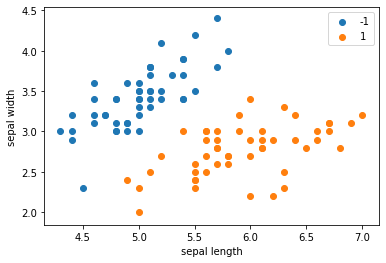

In [4]:
# visualize the data we have selected
plt.scatter(X[:50, 0], X[:50, 1], label='-1') # scatter: draw a scatter plot
plt.scatter(X[50:100, 0], X[50:100, 1], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## Perceptron
二分类，这里设定超平面为一元一次方程。

In [5]:
class Model:
    def __init__(self):
        self.w = np.zeros(data.shape[1]-1, dtype=np.float32)
        self.b = 0
        self.learning_rate = 0.1
        
    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y
    
    # SGD
    def sgd(self, X_train, y_train):
        is_wrong = True
        while is_wrong:
            wrong_count = 0
            for i in range(len(X_train)):
                X = X_train[i]
                y = y_train[i]
                if y * self.sign(X, self.w, self.b) <= 0:
                    self.w = self.w + self.learning_rate * np.dot(y, X)
                    self.b = self.b + self.learning_rate * y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = False
        return 'Perceptron Model!'

In [6]:
perceptron = Model()
perceptron.sgd(X, y)

'Perceptron Model!'

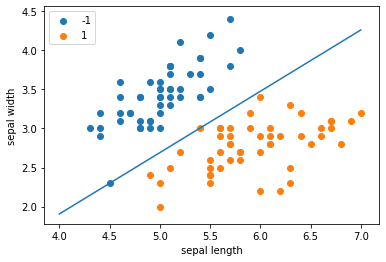

In [7]:
# visualize the perceptron we have got
x1_points = np.linspace(4, 7, 10)
x2_points = -(perceptron.w[0] * x1_points + perceptron.b) / perceptron.w[1]  # w[0] * x1 +w[1] * x2 + b = 0
plt.plot(x1_points, x2_points)

plt.scatter(X[:50, 0], X[:50, 1], label='-1') # scatter: draw a scatter plot
plt.scatter(X[50:100, 0], X[50:100, 1], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## scikit-learn Perceptron

In [8]:
from sklearn.linear_model import Perceptron

Perceptron的参数fit_intercept：布尔型，默认为True，若参数值为True时，代表训练模型需要加一个截距项；若参数为False时，代表模型无需加截距项。

In [9]:
# Call Library Function
clf = Perceptron(fit_intercept=True, max_iter=1000)
clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
# weights assigned to the features
print('weights: ', clf.coef_)

# Constants in decision function.——intercept
print('intercept: ', clf.intercept_)

weights:  [[ 23.2 -38.7]]
intercept:  [-5.]


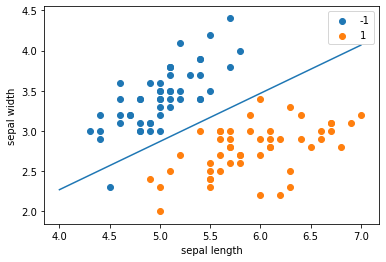

In [11]:
# visualize the perceptron from sklearn
x3_points = np.arange(4, 8)
x4_points = -(clf.coef_[0][0] * x3_points + clf.intercept_) / clf.coef_[0][1]  # w[0] * x1 +w[1] * x2 + b = 0
plt.plot(x3_points, x4_points)

plt.scatter(X[:50, 0], X[:50, 1], label='-1') # scatter: draw a scatter plot
plt.scatter(X[50:100, 0], X[50:100, 1], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()